## <span style="color:Aquamarine">**Exercise: Heart Failure Prediction**</span>

- Load heart disease dataset in pandas dataframe
- Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
- Convert text columns to numbers using label encoding and one hot encoding
- Apply scaling
- Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.
- Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
- Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. Use internet to figure out in what conditions bagging works the best.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:

df=pd.read_csv(r"F:\Machine Learning all Algorithms\18 Bagging and Boosting\heart disease.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


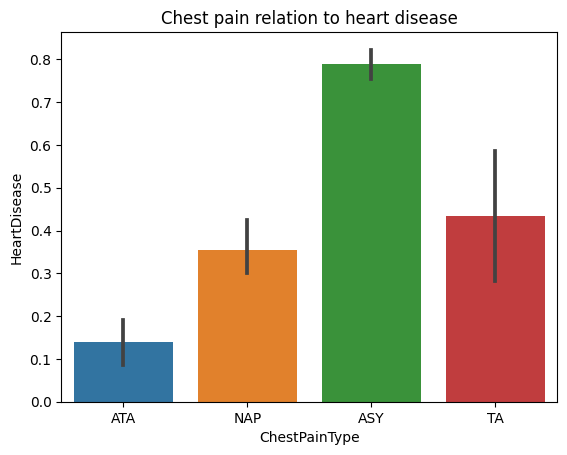

In [6]:
sns.barplot(x='ChestPainType', y='HeartDisease', data=df)
plt.title('Chest pain relation to heart disease')
plt.show()

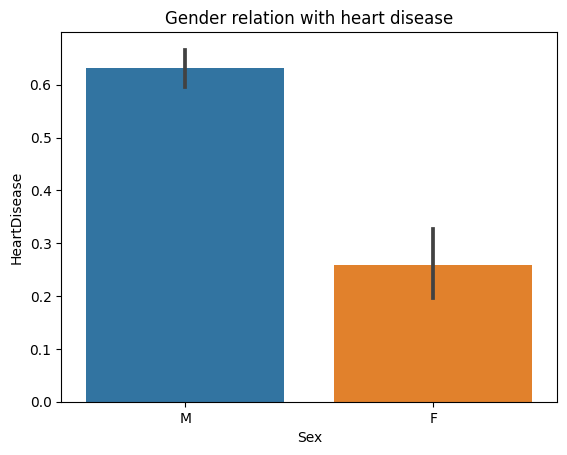

In [7]:
sns.barplot(x='Sex', y='HeartDisease', data=df)
plt.title('Gender relation with heart disease')
plt.show()

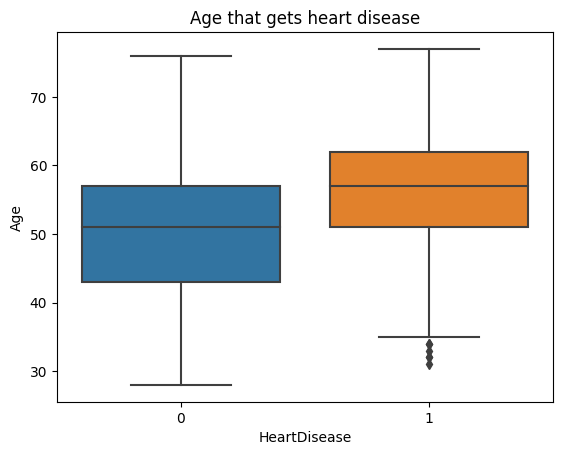

In [8]:
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age that gets heart disease')
plt.show()

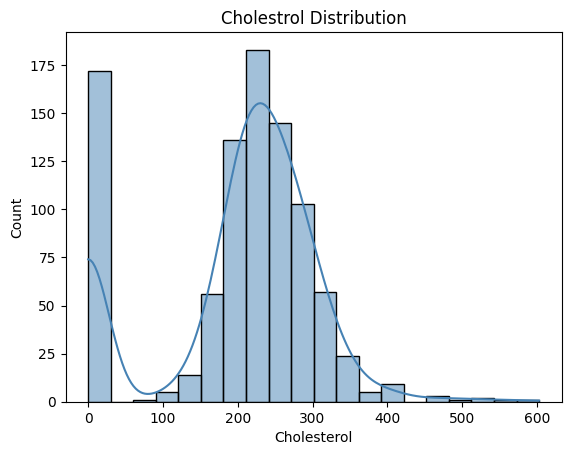

In [9]:
sns.histplot(df['Cholesterol'], bins=20, kde=True, color='steelblue')
plt.title('Cholestrol Distribution')
plt.show()

In [10]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [11]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [12]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [13]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [14]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [15]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### **Removing Outliers using zscore with 3,-3 deviation**

In [16]:
from scipy.stats import zscore

# Select the numerical cols for zscore calculation
num_cols=['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Filter Out Outliers having a Z-scores outside the range of [-3, 3] for these columns
df2=df[(zscore(df[num_cols]) > -3).all(axis=1) & (zscore(df[num_cols]) < 3).all(axis=1)]
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### **Convert Categorical Features to Numerical**

In [17]:
df3=df2.copy()
df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
sex_map={'M': 1, 'F': 0}
restingecg_map={'Normal':1, 'LVH':2, 'ST':3}
st_slope_map={'Down':1, 'Flat':2, 'Up':3}
exerciseangina_map={'Y':1, 'N':0}

df3['Sex']=df3['Sex'].map(sex_map)
df3['RestingECG']=df3['RestingECG'].map(restingecg_map)
df3['ST_Slope']=df3['ST_Slope'].map(st_slope_map)
df3['ExerciseAngina']=df3['ExerciseAngina'].map(exerciseangina_map)


In [19]:
df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,1,172,0,0.0,3,0
1,49,0,NAP,160,180,0,1,156,0,1.0,2,1
2,37,1,ATA,130,283,0,3,98,0,0.0,3,0
3,48,0,ASY,138,214,0,1,108,1,1.5,2,1
4,54,1,NAP,150,195,0,1,122,0,0.0,3,0


In [20]:
df3=pd.get_dummies(df3, drop_first=True, dtype='int')
df3.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,0.0,3,0,1,0,0
1,49,0,160,180,0,1,156,0,1.0,2,1,0,1,0
2,37,1,130,283,0,3,98,0,0.0,3,0,1,0,0
3,48,0,138,214,0,1,108,1,1.5,2,1,0,0,0
4,54,1,150,195,0,1,122,0,0.0,3,0,0,1,0


In [21]:
X=df3.drop(['HeartDisease'], axis=1)
y=df3['HeartDisease']

X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,0.0,3,1,0,0
1,49,0,160,180,0,1,156,0,1.0,2,0,1,0
2,37,1,130,283,0,3,98,0,0.0,3,1,0,0
3,48,0,138,214,0,1,108,1,1.5,2,0,0,0
4,54,1,150,195,0,1,122,0,0.0,3,0,1,0


### **Scaling the features using Standard Scaler**

In [22]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:3]

array([[-1.42815446,  0.515943  ,  0.46590022,  0.84963584, -0.5503622 ,
        -0.74329926,  1.38431998, -0.8229452 , -0.85546862,  1.04249607,
         2.06332497, -0.5349047 , -0.22955001],
       [-0.47585532, -1.93819859,  1.63471366, -0.16812204, -0.5503622 ,
        -0.74329926,  0.7529728 , -0.8229452 ,  0.13751561, -0.62216462,
        -0.48465463,  1.86949191, -0.22955001],
       [-1.7455875 ,  0.515943  , -0.1185065 ,  0.79361247, -0.5503622 ,
         1.77830843, -1.53566071, -0.8229452 , -0.85546862,  1.04249607,
         2.06332497, -0.5349047 , -0.22955001]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(719, 13)

In [25]:
X_test.shape

(180, 13)

In [26]:
y_train.value_counts()

HeartDisease
1    398
0    321
Name: count, dtype: int64

In [27]:
321/398

0.8065326633165829

In [28]:
y_test.value_counts()

HeartDisease
1    94
0    86
Name: count, dtype: int64

In [29]:
86/94

0.9148936170212766

### **Training using a stand alone Calssification model (SVM)**

In [30]:

from sklearn.model_selection import cross_val_score

svm_scores=cross_val_score(SVC(C=1, kernel='linear', gamma='auto'), X_scaled, y, cv=5)
svm_scores.mean()



0.813072625698324

### **Training using Bagging (SVM)**

In [31]:
from sklearn.ensemble import BaggingClassifier
bag_svm=BaggingClassifier(
    base_estimator=SVC(C=1, kernel='linear', gamma='auto'),
    n_estimators=100,
    max_samples=0.9,
    oob_score=True,
    random_state=0
)

bag_svm.fit(X_train, y_train)
bag_svm.oob_score_


c:\Users\Nafis Ansari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8553546592489569

In [32]:
bag_svm.score(X_test, y_test)

0.8611111111111112

#### **We can see some improvement in test score with bagging classifier as compared to a standalone classifier.**

### **Training using a stand alone Calssification model (Decision Tree Classifier)**

In [33]:
tree_clf=cross_val_score(DecisionTreeClassifier(criterion='gini'), X_scaled, y, cv=5)
tree_clf.mean()


0.7340409683426443

### **Training using Bagging (Decision Tree Classifier)**

In [34]:
from sklearn.ensemble import BaggingClassifier
bag_tree=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(criterion='gini'),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=42
)

tree_scores=cross_val_score(BaggingClassifier(), X_scaled, y, cv=5)
tree_scores.mean()

0.7830043451272501

## **Train a model using Random Forest which itself uses bagging underneath**

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_scores=cross_val_score(RandomForestClassifier(n_estimators=50, criterion='entropy'), X_scaled, y, cv=5)
print(rf_scores)

[0.84444444 0.83333333 0.83888889 0.83333333 0.73184358]


In [36]:
rf_scores.mean()

0.8163687150837988

### **Concluson**
- **SVM with bagging gave the best score as 86 along with some hyperparameter tunning**
- **Random Forest gave a good score as 81 with some hyperparameter tunning**

In [38]:
df3

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,0.0,3,0,1,0,0
1,49,0,160,180,0,1,156,0,1.0,2,1,0,1,0
2,37,1,130,283,0,3,98,0,0.0,3,0,1,0,0
3,48,0,138,214,0,1,108,1,1.5,2,1,0,0,0
4,54,1,150,195,0,1,122,0,0.0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,0,1.2,2,1,0,0,1
914,68,1,144,193,1,1,141,0,3.4,2,1,0,0,0
915,57,1,130,131,0,1,115,1,1.2,2,1,0,0,0
916,57,0,130,236,0,2,174,0,0.0,2,1,1,0,0


In [42]:
bag_svm.predict([[39,1,140,175,0,1,190,0,0,1,0,1,0]])

array([0], dtype=int64)